# Mellors MSDS 610 Final Project - Notebook 2: Part 6

## Part 6: Constructing a Model

### Part 6, Section 1: Loading Libraries and Data

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

In [2]:
host = r'127.0.0.1' 
db = r'MSDS610' 
user = r'postgres' 
pw = r'postgres' 
port = r'5432'
schema = r'cleaned'

In [3]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [4]:
table_name = r'vehicle_clean'
schema = r'cleaned'

In [5]:
df = pd.read_sql_table(table_name, db_conn, schema)

In [6]:
df.head()

,price,cylinders,age,luxury,region_encoded,manufacturer_encoded,condition_encoded,fuel_electric,fuel_gas,fuel_hybrid,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_encoded,mileage_encoded
0,6000.0,4,14,0,174.0,8.0,3,False,True,False,...,False,False,False,False,True,False,False,False,18.0,1
1,11900.0,4,14,0,77.0,8.0,3,False,True,False,...,False,False,False,False,True,False,False,False,34.0,1
2,21000.0,4,14,0,325.0,8.0,3,False,True,False,...,False,False,False,False,True,False,False,False,2.0,1
3,1500.0,4,14,0,93.0,8.0,3,False,True,False,...,False,False,False,False,True,False,False,False,20.0,1
4,4900.0,4,14,0,86.0,8.0,3,False,True,False,...,False,False,False,False,True,False,False,False,8.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426780 entries, 0 to 426779
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   age                   426780 non-null  int64  
 3   luxury                426780 non-null  int64  
 4   region_encoded        426780 non-null  float64
 5   manufacturer_encoded  426780 non-null  float64
 6   condition_encoded     426780 non-null  int64  
 7   fuel_electric         426780 non-null  bool   
 8   fuel_gas              426780 non-null  bool   
 9   fuel_hybrid           426780 non-null  bool   
 10  fuel_other            426780 non-null  bool   
 11  odometer_encoded      426780 non-null  float64
 12  title_encoded         426780 non-null  int64  
 13  transmission_manual   426780 non-null  bool   
 14  transmission_other    426780 non-null  bool   
 15  

### Part 6, Section 2: 3-Way Data Split

**Below:** I am splitting my data 3 ways. First, I have to define my features (X) and my target (y, "price"). I then need to do my first split, which I am going a 70/30, given the size of the dataset, I feel like this is a safe split and allows me to split val and test into 15% of the data each. After my first split, I am then splitting the second split in half (to make my 3-rd split, with 50/50 to test and validation).

In [8]:
X = df.drop(columns=["price"])
y = df['price']

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=4)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=4)

In [11]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (298746, 30), (298746,)
Validation: (64017, 30), (64017,)
Test: (64017, 30), (64017,)


## Part 6, Section 3: Model Selection

Given that this is a regression-based predictor (because "price" is a continuous feature) I am going to test a few regression models. I am predicting on the validation set, because I want to keep the testing data untouched until I have a model I like and have it tuned. Once I have a preferred model and it parameterized, I will test the model on the test data and then test on my "live" data.

### Regressor Model 1: Linear Regression

I am testing a Linear Regression model, because it was one the simpler models to implement, and it will help me assess if I need to perform a more complex regression model. No need to complicate things, if simple solutions exist. 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
lr_model = LinearRegression()

In [14]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_val_pred = lr_model.predict(X_val)

In [16]:
print(mean_absolute_error(y_val, y_val_pred))
print(r2_score(y_val, y_val_pred))

8097.135900074892
0.3909638761805333


**Summary:** A simple Linear Regression was not enough to make meaningful predictions. We can see from the results above, that the predictions are off by an average of 8,097 dollars and that the predictive power is low 0.39 (where 1.0 is a perfect model and a 0.0 has no predictive power). As such, I am going to try models that can handle more complex relationships within the data.

### Regressor Model 2: Random Forest

For my second model, I am testing the Random Forest Regressor, this is another simple model to enact, but it has much more performative power than the Linear Regression.

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=4)

In [19]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=4)

In [20]:
y_val_pred_rf = rf_model.predict(X_val)

In [21]:
print(mean_absolute_error(y_val, y_val_pred_rf))
print(r2_score(y_val, y_val_pred_rf))

4284.891824920434
0.7176342787120767


**Summary:** Random Forest Regressor, with its default parameters, performed twice as better than the Logistic Regression. For the RF, the predictions were off by 4,285 dollars with a R2 (predictive power) score of 71. I am going to try one more model, then I am going to select my model and parameter tune.

### Regressor Model 3: XGBoost

I am doing XGBoost for my third - and final - testing model, because it is great for regression and has the ability to handle weaker predictions and better at determining feature importance than Random Forests, and has more parameters that can be adjusted.

In [22]:
from xgboost import XGBRegressor

In [23]:
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=4)

In [24]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=4, ...)

In [25]:
y_val_pred_xgb = xgb_model.predict(X_val)

In [26]:
print(mean_absolute_error(y_val, y_val_pred_xgb))
print(r2_score(y_val, y_val_pred_xgb))

6224.034690404552
0.582967249348175


**Summary:** I was anticipating the XGBoost with baseline parameters to perform better than the Random Forest, but that didn't occur. The XGBoost predictions were off by an average of 6,224 dollars with a 0.58 prediction power score. 

## Part 6, Section 4: Final Model Selection & Parameter Turning

Out the gate, between the 3 models I tested, RF performed the best with baseline parameters. However, I am opting to select and parameter-tune the XGBoost model because it significantly more parameters, which I think I can utilize to get it perform at least as good as, if not better, than the RF. My goal is to get the R2 score to at least 75%, but I would like to see over 80%.

**Below:** Taking and parameter-tuning some of the most common parameters for XGBoost, I am able to get the model up to 0.74, not quite as high as I would have liked, but finding the compromise between capability and computational requirement, I am opting to keep this model. 

In [27]:
xgb_model = XGBRegressor(n_estimators=1500, learning_rate=0.02, max_depth=13, subsample=0.85, random_state=4)

In [28]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=4, ...)

In [29]:
y_val_pred_xgb = xgb_model.predict(X_val)

In [30]:
print(mean_absolute_error(y_val, y_val_pred_xgb))
print(r2_score(y_val, y_val_pred_xgb))

4272.510559347218
0.7419365950712643


In [31]:
import xgboost as xgb

**Below:** I mapped out the top 10 most important features for my model. Age is the most important, followed by region and odometer. I think that this a good model.

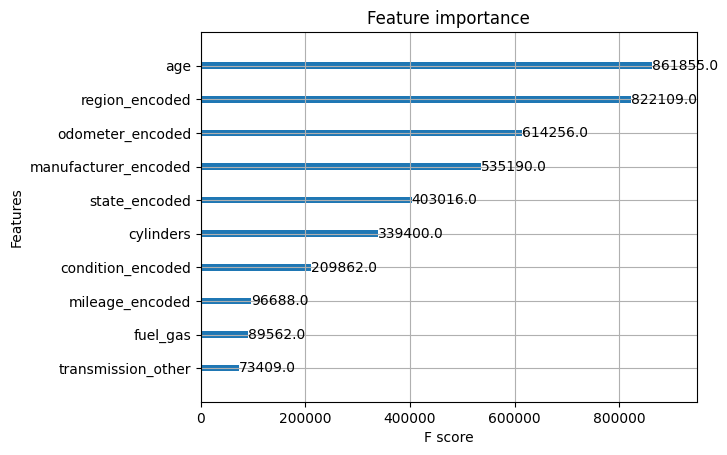

In [32]:
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()

**Summary:** Because this is a regressor model, I am using the mean absolute error and r2 scores to dtermine the "accuracy of the model, because this information tell me how much (dollars) the average prediction is to the the actual and how much "predictive power" the model has (1 = perfect, 0 = no predictive power). With parameter tuning, I was able to get this model to perform better than both the RF and LR models. I was able to get the R2 (predictive power) up to 0.74 and an average (MAE) price offest of 4,272 dollars. I also looked at the top 10 features, and the top 3 were "age", "region", and "odometer", which would have been my personal assessment on what I would think was most important when deciding the price of a used vehicle. One thing of note, while "condition" is in my top 10 (seventh), I would have predicted it to be higher. However, I think that this model meets my expectations and therefore, the parameter tuning is complete and I will test this on the testing data.

## Part 6, Section 5: Testing the Model on Test Data

In [33]:
y_test_pred = xgb_model.predict(X_test)

In [34]:
print(mean_absolute_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

4254.289845081844
0.7438560391959227


**Summary:** With a R2 score of 0.743 (as opposed to the validation's at 0.741), my model performed slightly better than the validation set, slightly reducing the the prediction price offset to 4,254 dollars. The model is ready to be saved and used with the "live" data.

## Part 6, Section 6: Saving the Model

In [35]:
import joblib

In [36]:
model_filename = "xgb_price_predictor.pkl"

In [37]:
joblib.dump(xgb_model, model_filename)

['xgb_price_predictor.pkl']

## Part 6, Section 7: Exporting Column Order

**Below:** I am exporting the column order to make sure that the columns match what is expected when the model runs on my live data. I am using a pickle file, because they are easy to create and implement and allows to continutity across notebooks.

In [39]:
expected_columns = list(df.columns)
with open("expected_columns.pkl", "wb") as f:
    pickle.dump(expected_columns, f)